# Classifier development

The notebook in which I do a rough draft of the classifier scripts before putting them into a script

In [ ]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import random
import string
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

In [ ]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis


full_filename = "../data/by_article_fulltext_112919-2.jl"

# get full text dataset as a df
full_df = imp.init_df(full_filename, "full")

# get full dataset as a dict
full_dict = imp.init_df(full_filename, "full", "dict")

print("done")

In [ ]:

# sample=5

print(full_dict["headline"][sample])
print(full_dict["tags"][sample])
print(full_dict["text"][sample])

In [ ]:
# sample for manual coding
# sample = [random.randint(1, len(full_dict)) for j in range(50)]
sample1 = [3188, 1591, 2152, 4044, 2789, 5685, 5191, 2360, 518, 189, 5509, 3033, 499, 2024, 3563, 4216, 1422, 3904, 3256, 420, 4940, 3397, 6087, 4548, 227, 4817, 1351, 765, 4161, 5139, 4899, 5243, 1334, 4234, 2629, 815, 5516, 2170, 1765, 3183, 5143, 3225, 1759, 5209, 5249, 4487, 3447, 4963, 2656, 825]
# print(sample)

# Make sure sample has only unique values
print(len(sample1))
print(len(set(sample1)))

In [ ]:
print(type(sample1))
#full_df.tail()

In [ ]:
# clean punctuation Except for quotations

print(type(string.punctuation))

def no_punctuation(text, quotes=False):
    for mark in string.punctuation:
        if quotes == True:
            if mark == "\"":
                continue
        text = text.replace(mark,"")
    return(text)

test = no_punctuation(full_dict["text"][5])
print(test)

In [ ]:
#####################
### Do Not Use :( ###
#####################

# def replace_quotes(text, flag="false", error="false", right="false"):
#     text = text.replace("\“","\"")
#     open_q = "init"
#     qi = "init"
#     to_replace = []
#     if type(error) == int:
#         count = error
#     for i in range(len(text)):
#         # print(text[i:i+2])
#         if text[i] == "\"":
#             # print("hi")
#             # print(text[i-1:i+2]+"END")
#             if text[i-1:i+1] == " \"":
#                 # print(text[i-1:i+2]+"END")
#                 if text[i-1:i+2] == " \" ":
#                     if open_q == True:
#                         # fixed?
#                         # print("\nfull quote+++++ "+text[qi:i+1+100]+"\n")
#                         # print("\nfull quote!!: "+text[qi:i+1]+"\n")
#                         if qi == "none":
#                             qi = i
#                             open_q = True
#                         else:
#                             to_replace.append(text[qi:i+1])
#                             qi = "none"
#                             right += 1
#                             open_q == False
#                     else:
#                         continue
#                 if open_q == True and flag=="true":
#                     if type(qi) == int:
#                         # print("incomplete: "+text[qi-10:qi+100])
#                         # print("next: ",len(text[qi:i+1]))
#                         # print("##############################")
#                         to_replace.append(text[qi:i+1])
#                         count += 1
#                     else:
#                         # print(qi)
#                         qi = qi
#                 # print("quote start: " + text[i-10:i+20])
#                 else:
#                     open_q = True
#                     qi = i
#                     # print("test28")
#                 # print(qi)
#             elif text[i:i+2] == "\" ":
#                 # print("hi")
#                 # print("quote end: " + text[i-20:i+10])
#                 # print(qi)
#                 if type(qi) == str:
#                     # print("in media res :(")
#                     # print(text[:i+20])
#                     # print("wat?")
#                     if qi == "init":
#                         # print(len(text[:i]))
#                         to_replace.append(text[:i])
#                         open_q = False
#                         # count +=1
#                     continue
#                 # print("\nfull quote:"+text[qi:i+1]+"\n")
#                 # print("problem?2 ",str(qi))
#                 to_replace.append(text[qi:i+1])
#                 open_q = False
#                 right += 1
#             else: # " is present, but with other characters on either side
#                 if type(qi) == str:
#                     if qi == "init":
#                         qi = i
#                         open_q == True
#                     else:
#                         qi = i
#                         open_q = True
#                 else:
#                     # print("\nfull quote:"+text[qi:i+1]+"\n")
#                     open_q = False
#                     right += 1
#         # if " says " == text[i:i+5]:
#         #     if open_q==True:
#         #         # print("says correction: "+text[qi:i+5])
#         #         hi = "hi"

#     for quote in to_replace:
#         text = text.replace(quote," QUOTATION_REPLACEMENT ")
#     if type(error) == int:
#         return(text, count, right)
#     else:
#         return(text)

# # replace_quotes(no_punctuation(full_dict["text"][5]))
# #  "\“"

In [ ]:
def replace_quotes(text, flag="false", error="false", right="false"):
    text = text.replace("\“","\"")
    count = error

    quotes = re.findall(r'\"(.+?)\"', text)

    to_replace = quotes


    for quote in to_replace:
        text = text.replace(quote," QUOTATION_REPLACEMENT ")
        # print(quote+"\n")
    if type(error) == int:
        right += len(quotes)
        return(text, count, right)
    else:
        return(text)


In [ ]:
# for development

first_pronouns = [" i "," im ", " ive ", " id "," my ", " me ", " myself "]
second_pronouns = [" you "," youre ", " youve "," youd "," your ", " yourself "]
third_pronouns = []

counts = {}
counts4df = {"id":[],"first":[],"second":[],"wc":[]}
error = 0
right = 0

for samp in sample1:
# for samp in range(len(full_dict)):
    count1 = 0
    count2 = 0
    w_text = no_punctuation(full_dict["text"][samp])
    # print(w_text.count("\"")%2)
    if w_text.count("\"")%2 != 0:
        flag = "true"
    else:
        flag = "false"
    #     print(w_text.count("\""))
    #     print(w_text.replace("\"","[QUOTATION MARK]"))
    #     print("##########################################################")
    w_text, error, right = replace_quotes(w_text, flag=flag, error=error, right=right)
    # print(w_text)
    for pro in first_pronouns:
        count1 += w_text.count(pro)
    for pro in second_pronouns:
        count2 += w_text.count(pro)
    wc = len(w_text.split(" "))
    counts[samp] = {"first":count1, "second":count2, "wc":wc}
    counts4df["id"].append(samp)
    counts4df["first"].append(count1)
    counts4df["second"].append(count2)
    counts4df["wc"].append(wc)

# print(counts)
counts_df = pd.DataFrame(counts4df)
counts_df.head(10)
print(right)


In [ ]:
counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# sns.distplot(counts_df["frac1"], color="blue")
# sns.distplot(counts_df["frac2"], color="red")

sns.scatterplot(x="frac1", y="frac2", data=counts_df)

In [ ]:
counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# sns.distplot(counts_df["frac1"], color="blue")
# sns.distplot(counts_df["frac2"], color="red")

sns.scatterplot(x="frac1", y="frac2", data=counts_df)



In [ ]:
# setting up above script into a function

def pronouns(f_dict, sample="none"):
    first_pronouns = [" i "," im ", " ive ", " id "," my ", " me ", " myself "]
    second_pronouns = [" you "," youre ", " youve "," youd "," your "," yourself "]
    third_pronouns = []

    if sample == "none":
        sample = [i for i in range(len(f_dict))]

    counts = {}
    counts4df = {"id":[],"first":[],"second":[],"wc":[]}

    for samp in sample:
        count1 = 0
        count2 = 0
        w_text = no_punctuation(f_dict["text"][samp])
        for pro in first_pronouns:
            count1 += w_text.count(pro)
        for pro in second_pronouns:
            count2 += w_text.count(pro)
        wc = len(w_text.split(" "))
        counts[samp] = {"first":count1, "second":count2, "wc":wc}
        counts4df["id"].append(samp)
        counts4df["first"].append(count1)
        counts4df["second"].append(count2)
        counts4df["wc"].append(wc)

    c_df = pd.DataFrame(counts4df)
    return(c_df)

counts_df = pronouns(full_dict)
counts_df.head()

In [401]:
# setting up above script into a function

def pronouns(f_df, sample="none"):
    first_pronouns = [" i "," im ", " ive ", " id "," my ", " me ", " myself "]
    second_pronouns = [" you "," youre ", " youve "," youd "," your ", " yourself "]
    third_pronouns = []

    if sample == "none":
        sample = [i for i in range(len(f_df))]

    counts = {}
    counts4df = {"id":[],"year":[],"first":[],"second":[],"wc":[]}

    for samp in sample:
        count1 = 0
        count2 = 0
        w_text = no_punctuation(f_df["text"][samp], quotes=True)
        w_text = replace_quotes(w_text)
        w_text = no_punctuation(w_text, quotes=False)
        for pro in first_pronouns:
            count1 += w_text.count(pro)
        for pro in second_pronouns:
            count2 += w_text.count(pro)
        wc = len(w_text.split(" "))
        counts[samp] = {"first":count1, "second":count2, "wc":wc}
        counts4df["id"].append(samp)
        counts4df["year"].append(f_df["year"][samp])
        counts4df["first"].append(count1)
        counts4df["second"].append(count2)
        counts4df["wc"].append(wc)

    c_df = pd.DataFrame(counts4df)
    return(c_df)

def count_pro(clean_text, person):
    if person == "first":
        pronouns = [" i "," im ", " ive ", " id "," my ", " me ", " myself "]
    elif person == "second":
        pronouns = [" you "," youre ", " youve "," youd "," your ", " yourself "]
    else:
        pronouns = []
    
    count = 0

    clean_text = replace_quotes(clean_text)

    for pro in pronouns:
        count += clean_text.count(pro)
    return(count)

counts_df = pronouns(full_dict)

counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

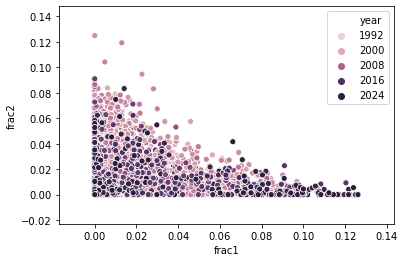

In [357]:
sns.scatterplot(x="frac1", y="frac2", hue="year", data=counts_df)
plt.savefig("../figs/pronounsovertime.png")

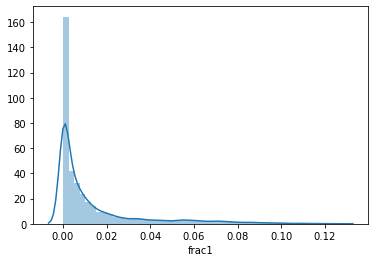

In [365]:
# without removing quotations

sns.distplot(counts_df["frac1"])

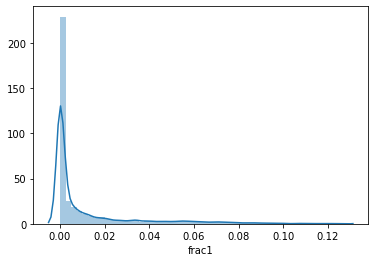

In [361]:
#quotations removed

sns.distplot(counts_df["frac1"])

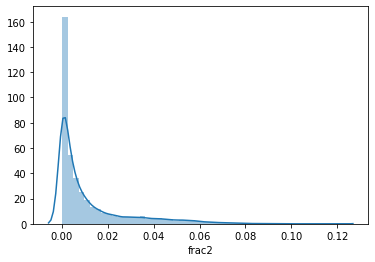

In [367]:
# without removing quotations

sns.distplot(counts_df["frac2"])

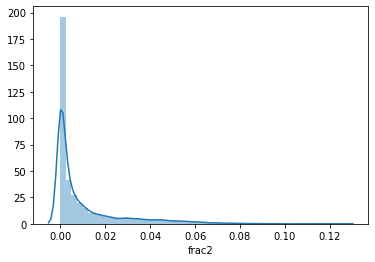

In [362]:
sns.distplot(counts_df["frac2"])

In [383]:
print(np.quantile(counts_df.frac1,.3))
print(np.quantile(counts_df.frac2,.3))
print(max(counts_df.frac1)*.1)
print(max(counts_df.frac2)*.1)

0.0008183306055646482
0.0010548523206751054
0.012614980289093298
0.012097812097812098


d:\Box Sync\editorials\scripts\desc_vis.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["n"] = 1


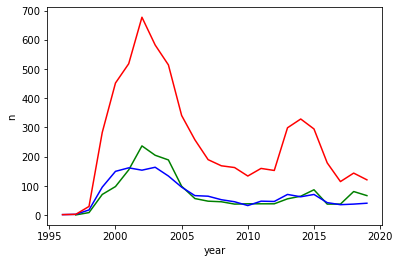

In [382]:
# Try very rough buckets based on the proportion of pronouns

first_df = counts_df[counts_df.frac1 > max(counts_df.frac1)*.1]
second_df = counts_df[counts_df.frac2 > max(counts_df.frac2)*.1]

first_vis = vis.prep_per(first_df, group_by="year")
second_vis = vis.prep_per(second_df, group_by="year")
full_vis = vis.prep_per(full_df, group_by = "year")

sns.lineplot(x = "year", y = "n", color = "green", data=first_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data=second_vis)
sns.lineplot(x = "year", y = "n", color = "red", data = full_vis)

plt.savefig("../figs/bucketsovertime.png")

# Set up hand-coding for first, second and third

In [402]:
# too annoying in jupyter notebooks

import pickle

sample_t = [2,4,300,8]

counts4df = {"id":[],"first":[],"second":[],"wc":[],"first_f":[],"second_f":[], "input":[]}

count = 0

for num in sample_t:
    count+=1
    text = full_dict["text"][num]
    wc = len(text.split(" "))
    # print(num)
    # print(count_pro(text, "first")/wc)
    # print(count_pro(text, "second")/wc)
    print("\n\n"+str(count))
    print(text)
    advance = input("any key")
    counts4df["id"].append(num)
    # counts4df["year"].append(f_df["year"][samp])
    counts4df["first"].append(count_pro(text, "first"))
    counts4df["second"].append(count_pro(text, "second"))
    counts4df["wc"].append(wc)
    counts4df["first_f"].append(count_pro(text, "first")/wc)
    counts4df["second_f"].append(count_pro(text, "second")/wc)
    counts4df["input"].append(advance)

hand_coded_df = pd.DataFrame(counts4df)

with open('pickles/hand_coded_t.pickle', 'wb') as output:
    pickle.dump(hand_coded_df, output)

print("done")

 different variables that make up the mbti make some sense and are somewhat familiar. they are: extroversion versus introversion sensing versus intuiting thinking versus feeling judging versus perceiving the book   by paul tieger and barbara barron-tieger describes the mbti in full detail and profiles all 16 personality types and the types of careers they find fulfilling. the mbti is used a great deal in this country, mostly by workplace psychologists and management consultants to diagnose dysfunctional relationships in the workplace. does it help to know that your arrogant, self-aggrandizing, totalitarian adviser is an entj? only if it results in some behavioral change or the loss of his job! there are some career fields where particular personalities might feel more at home. for example, a person who scores high in extroversion might be more happy in a job in sales or project management than would an introvert. a "judger" might not make as good a counselor as someone who scores high 

In [403]:
with open("pickles/hand_coded.pickle", 'rb') as data:
    df = pickle.load(data)

df

,id,first,second,wc,first_f,second_f,input
0,2,3,16,1286,0.002333,0.012442,1
1,4,4,60,1720,0.002326,0.034884,2
2,300,12,27,918,0.013072,0.029412,3
3,8,7,51,1276,0.005486,0.039969,1
